<a href="https://colab.research.google.com/github/SathyaSudha-96/Deep-Learning-2021-22/blob/main/IDL_Assignment_7_SathyaSudhaMurugan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow_text

In [ ]:
import numpy as np
import typing
from typing import Any, Tuple
import tensorflow as tf
import tensorflow_text as tf_text
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [ ]:
use_builtins = True

In [ ]:
# Download the file
import pathlib
path_to_zip = "/content/drive/MyDrive/Intro_to_deepLearning/Assignment_7/tam.txt"
path_to_file = pathlib.Path(path_to_zip)

In [ ]:
file = '/content/drive/MyDrive/Intro_to_deepLearning/Assignment_7/tam.txt'
tam_eng = open(file, 'r')
tam_eng_content = tam_eng.read()
print(tam_eng_content)

I slept.	நான் தூங்கினேன்.	CC-BY 2.0 (France) Attribution: tatoeba.org #3199633 (CM) & #7098307 (Singaravelu)
Calm down.	அமைதியாக இருங்கள்	CC-BY 2.0 (France) Attribution: tatoeba.org #435575 (CK) & #4268041 (Singaravelu)
I'll walk.	நான் நடப்பேன்.	CC-BY 2.0 (France) Attribution: tatoeba.org #2111765 (CK) & #7157338 (Singaravelu)
Who is he?	அவன் யார்?	CC-BY 2.0 (France) Attribution: tatoeba.org #347331 (sysko) & #4267937 (Singaravelu)
Who knows?	யாருக்குத் தெரியும்?	CC-BY 2.0 (France) Attribution: tatoeba.org #276369 (CK) & #4267939 (Singaravelu)
She smiled.	அவள் சிரித்தாள்	CC-BY 2.0 (France) Attribution: tatoeba.org #311898 (CK) & #4267854 (Singaravelu)
Talk to me!	என்னிடம் பேசு	CC-BY 2.0 (France) Attribution: tatoeba.org #320369 (CK) & #4157451 (Singaravelu)
Who is she?	அவள் யார்?	CC-BY 2.0 (France) Attribution: tatoeba.org #315731 (CK) & #4267855 (Singaravelu)
Go to sleep.	போய் தூங்கு	CC-BY 2.0 (France) Attribution: tatoeba.org #453530 (saasmath) & #4157452 (Singaravelu)
It may rain.	ம

In [ ]:
def load_data(path):
  text = path.read_text(encoding='utf-8')
  #text = tam_eng.read()

  lines = text.splitlines()
  pairs = [line.split('\t')[:-1] for line in lines]

  inp = [inp for targ, inp in pairs]
  targ = [targ for targ, inp in pairs]

  return targ, inp


In [ ]:
targ, inp = load_data(path_to_file)
print('Input:',inp[11])
print('Target:',targ[11])

Input: அவள் அவனைக் அடித்தாள்
Target: She hit him.


In [ ]:
def tf_lower_and_split_punct(text):
  # Split accecented characters.
  text = tf_text.normalize_utf8(text, 'NFKD')
  text = tf.strings.lower(text)
  # Keep space, a to z, and select punctuation.
  text = tf.strings.regex_replace(text, '[*]', '')
  # Add spaces around punctuation.
  text = tf.strings.regex_replace(text, '[.?!,¿]', r' \0 ')
  # Strip whitespace.
  text = tf.strings.strip(text)

  text = tf.strings.join(['[START]', text, '[END]'], separator=' ')
  return text

In [ ]:
BUFFER_SIZE = len(inp)

dataset = tf.data.Dataset.from_tensor_slices((inp, targ)).shuffle(BUFFER_SIZE)
dataset = dataset.repeat(5).batch(4)

In [ ]:
for example_input_batch, example_target_batch in dataset.take(1):
  print(example_input_batch[:5])
  print()
  print(example_target_batch[:5])
  break

tf.Tensor(
[b'\xe0\xae\xb5\xe0\xae\xb2\xe0\xae\xa4\xe0\xaf\x81 \xe0\xae\xaa\xe0\xae\x95\xe0\xaf\x8d\xe0\xae\x95\xe0\xae\xa4\xe0\xaf\x8d\xe0\xae\xa4\xe0\xaf\x88 \xe0\xae\x95\xe0\xae\x9f\xe0\xaf\x88\xe0\xae\xaa\xe0\xaf\x8d \xe0\xae\xaa\xe0\xae\xbf\xe0\xae\x9f\xe0\xae\xbf'
 b'\xe0\xae\x85\xe0\xae\xb5\xe0\xae\xb3\xe0\xaf\x8d \xe0\xae\x8e\xe0\xae\xa4\xe0\xae\xb1\xe0\xaf\x8d\xe0\xae\x95\xe0\xaf\x81\xe0\xae\xae\xe0\xaf\x8d \xe0\xae\xaa\xe0\xae\xaf\xe0\xae\xaa\xe0\xaf\x8d\xe0\xae\xaa\xe0\xae\x9f\xe0\xaf\x81\xe0\xae\xb5\xe0\xae\xa4\xe0\xae\xbf\xe0\xae\xb2\xe0\xaf\x8d\xe0\xae\xb2\xe0\xaf\x88'
 b'\xe0\xae\x85\xe0\xae\xb5\xe0\xae\xb3\xe0\xaf\x8d \xe0\xae\x85\xe0\xae\xb1\xe0\xaf\x88\xe0\xae\xaf\xe0\xaf\x88 \xe0\xae\xb5\xe0\xae\xbf\xe0\xae\x9f\xe0\xaf\x8d\xe0\xae\x9f\xe0\xaf\x81 \xe0\xae\xb5\xe0\xaf\x86\xe0\xae\xb3\xe0\xae\xbf\xe0\xae\xaf\xe0\xaf\x87 \xe0\xae\x9a\xe0\xaf\x86\xe0\xae\xa9\xe0\xaf\x8d\xe0\xae\xb1\xe0\xae\xbe\xe0\xae\xb3\xe0\xaf\x8d'
 b'\xe0\xae\xa8\xe0\xaf\x80 \xe0\xae\xaa\xe0\xae\xa3\

In [ ]:
max_vocab_size = 5000

input_text_processor = tf.keras.layers.TextVectorization(
    standardize=tf_lower_and_split_punct,
    max_tokens=max_vocab_size)

input_text_processor.adapt(inp)

# Here are the first 10 words from the vocabulary:
input_text_processor.get_vocabulary()

['',
 '[UNK]',
 '[START]',
 '[END]',
 'நான்',
 'அவள்',
 '?',
 '.',
 'அவன்',
 'டாம்',
 'ஒரு',
 'என்று',
 'அவனுக்கு',
 'நீ',
 'தெரியும்',
 'என்னிடம்',
 'வேண்டும்',
 'எனக்கு',
 'நிறைய',
 'என்ன',
 'இந்த',
 'இது',
 'விரும்புகிறேன்',
 'யார்',
 'போய்',
 'பயம்',
 'நாங்கள்',
 'எப்பொழுது',
 'என்',
 'உன்னிடம்',
 'இருக்கிறது',
 'அந்த',
 'வெளியே',
 'வந்தான்',
 'மேரியுடன்',
 'பணம்',
 'சொன்னான்',
 'செல்ல',
 'செய்து',
 'ஓட',
 'எப்படி',
 'எனக்குத்',
 'அவளிடம்',
 'அவர்கள்',
 'அவனைக்',
 'அதை',
 'வேகமாக',
 'வில்லை',
 'விலை',
 'விட்டு',
 'வார்த்தையைப்',
 'வா',
 'வருவான்',
 'வர',
 'வந்து',
 'ரொம்ப',
 'மேரியை',
 'மூன்று',
 'முழுவதும்',
 'முன்னால்',
 'முடியும்',
 'மக்கள்',
 'போகத்',
 'போக',
 'பொழுது',
 'பார்க்கிறேன்',
 'பார்',
 'பற்றி',
 'பயன்',
 'பட்டாள்',
 'நீங்கள்',
 'நடக்க',
 'தெரியுமா',
 'துண்டு',
 'டாமிடம்',
 'சொல்லாதே',
 'செய்ய',
 'சிரித்தாள்',
 'சாப்பிட',
 'கொடுத்தாள்',
 'கிளம்ப',
 'கல்யாணம்',
 'ஒவ்வொரு',
 'ஏதாவது',
 'எல்லோரும்',
 'என்றால்',
 'என்பது',
 'என்னுடைய',
 'என்னால்',
 'என',
 'எதிர

In [ ]:
output_text_processor = tf.keras.layers.TextVectorization(
    standardize=tf_lower_and_split_punct,
    max_tokens=max_vocab_size)

output_text_processor.adapt(targ)
output_text_processor.get_vocabulary()

['',
 '[UNK]',
 '[START]',
 '[END]',
 '.',
 'to',
 'of',
 'i',
 'he',
 'the',
 'she',
 '?',
 'is',
 'you',
 'a',
 'tom',
 'and',
 'him',
 'it',
 'do',
 'me',
 'go',
 'come',
 "i'm",
 'when',
 'in',
 'your',
 'my',
 'we',
 'want',
 'up',
 'this',
 'that',
 "it's",
 'has',
 "don't",
 'see',
 'out',
 'know',
 'her',
 'have',
 'with',
 'who',
 'what',
 'walk',
 'us',
 'got',
 'be',
 'afraid',
 ',',
 '!',
 'was',
 'think',
 'people',
 'on',
 'not',
 'money',
 'mary',
 'leave',
 'kind',
 'keep',
 'can',
 'been',
 'are',
 'where',
 'went',
 'told',
 'time',
 'them',
 'sleep',
 'run',
 'ran',
 'now',
 'lot',
 'listen',
 "i'll",
 'how',
 'here',
 'did',
 'by',
 'began',
 'arrived',
 'am',
 'all',
 'after',
 'about',
 'word',
 'way',
 'use',
 'three',
 "that's",
 'tell',
 'sure',
 'still',
 'speak',
 'something',
 'smiled',
 'sit',
 'silent',
 'seems',
 'school',
 'sat',
 'right',
 'price',
 'plan',
 'place',
 'picked',
 'our',
 'much',
 'may',
 'married',
 'made',
 'live',
 'like',
 'just',
 'i

In [ ]:
example_tokens = input_text_processor(example_input_batch)
example_tokens[:8, :7]

<tf.Tensor: shape=(4, 7), dtype=int64, numpy=
array([[  2, 147, 249, 423, 217,   3,   0],
       [  2,   5, 455, 231,   3,   0,   0],
       [  2,   5, 538,  49,  32, 358,   3],
       [  2,  13, 238, 131,   6,   3,   0]])>

In [ ]:
input_vocab = np.array(input_text_processor.get_vocabulary())
tokens = input_vocab[example_tokens[0].numpy()]
' '.join(tokens)

'[START] வலது பக்கத்தை கடைப் பிடி [END] '

Text(0.5, 1.0, 'Mask')

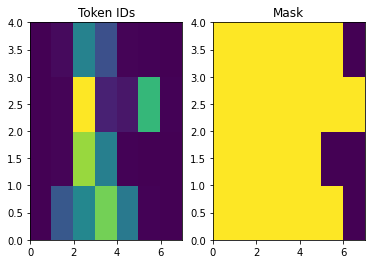

In [ ]:
plt.subplot(1, 2, 1)
plt.pcolormesh(example_tokens)
plt.title('Token IDs')

plt.subplot(1, 2, 2)
plt.pcolormesh(example_tokens != 0)
plt.title('Mask')

In [ ]:
embedding_dim = 256
units = 1024

In [ ]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, input_vocab_size, embedding_dim, enc_units):
    super(Encoder, self).__init__()
    self.enc_units = enc_units
    self.input_vocab_size = input_vocab_size

    # The embedding layer converts tokens to vectors
    self.embedding = tf.keras.layers.Embedding(self.input_vocab_size,
                                               embedding_dim)

    # The GRU RNN layer processes those vectors sequentially.
    self.gru = tf.keras.layers.GRU(self.enc_units,
                                   # Return the sequence and state
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

  def call(self, tokens, state=None):
    shape_checker = ShapeChecker()
    shape_checker(tokens, ('batch', 's'))

    # 2. The embedding layer looks up the embedding for each token.
    vectors = self.embedding(tokens)
    shape_checker(vectors, ('batch', 's', 'embed_dim'))

    # 3. The GRU processes the embedding sequence.
    #    output shape: (batch, s, enc_units)
    #    state shape: (batch, enc_units)
    output, state = self.gru(vectors, initial_state=state)
    shape_checker(output, ('batch', 's', 'enc_units'))
    shape_checker(state, ('batch', 'enc_units'))

    # 4. Returns the new sequence and its state.
    return output, state

In [ ]:
#@title Shape checker
class ShapeChecker():
  def __init__(self):
    # Keep a cache of every axis-name seen
    self.shapes = {}

  def __call__(self, tensor, names, broadcast=False):
    if not tf.executing_eagerly():
      return

    if isinstance(names, str):
      names = (names,)

    shape = tf.shape(tensor)
    rank = tf.rank(tensor)

    if rank != len(names):
      raise ValueError(f'Rank mismatch:\n'
                       f'    found {rank}: {shape.numpy()}\n'
                       f'    expected {len(names)}: {names}\n')

    for i, name in enumerate(names):
      if isinstance(name, int):
        old_dim = name
      else:
        old_dim = self.shapes.get(name, None)
      new_dim = shape[i]

      if (broadcast and new_dim == 1):
        continue

      if old_dim is None:
        # If the axis name is new, add its length to the cache.
        self.shapes[name] = new_dim
        continue

      if new_dim != old_dim:
        raise ValueError(f"Shape mismatch for dimension: '{name}'\n"
                         f"    found: {new_dim}\n"
                         f"    expected: {old_dim}\n")

In [ ]:
# Convert the input text to tokens.
example_tokens = input_text_processor(example_input_batch)

# Encode the input sequence.
encoder = Encoder(input_text_processor.vocabulary_size(),
                  embedding_dim, units)
example_enc_output, example_enc_state = encoder(example_tokens)

print(f'Input batch, shape (batch): {example_input_batch.shape}')
print(f'Input batch tokens, shape (batch, s): {example_tokens.shape}')
print(f'Encoder output, shape (batch, s, units): {example_enc_output.shape}')
print(f'Encoder state, shape (batch, units): {example_enc_state.shape}')

Input batch, shape (batch): (4,)
Input batch tokens, shape (batch, s): (4, 7)
Encoder output, shape (batch, s, units): (4, 7, 1024)
Encoder state, shape (batch, units): (4, 1024)


In [ ]:
class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super().__init__()
    # For Eqn. (4), the  Bahdanau attention
    self.W1 = tf.keras.layers.Dense(units, use_bias=False)
    self.W2 = tf.keras.layers.Dense(units, use_bias=False)

    self.attention = tf.keras.layers.AdditiveAttention()

  def call(self, query, value, mask):
    shape_checker = ShapeChecker()
    shape_checker(query, ('batch', 't', 'query_units'))
    shape_checker(value, ('batch', 's', 'value_units'))
    shape_checker(mask, ('batch', 's'))

    # From Eqn. (4), `W1@ht`.
    w1_query = self.W1(query)
    shape_checker(w1_query, ('batch', 't', 'attn_units'))

    # From Eqn. (4), `W2@hs`.
    w2_key = self.W2(value)
    shape_checker(w2_key, ('batch', 's', 'attn_units'))

    query_mask = tf.ones(tf.shape(query)[:-1], dtype=bool)
    value_mask = mask

    context_vector, attention_weights = self.attention(
        inputs = [w1_query, value, w2_key],
        mask=[query_mask, value_mask],
        return_attention_scores = True,
    )
    shape_checker(context_vector, ('batch', 't', 'value_units'))
    shape_checker(attention_weights, ('batch', 't', 's'))

    return context_vector, attention_weights

In [ ]:
attention_layer = BahdanauAttention(units)

In [ ]:
(example_tokens != 0).shape

TensorShape([4, 7])

In [ ]:
# Later, the decoder will generate this attention query
example_attention_query = tf.random.normal(shape=[len(example_tokens), 2, 10])

# Attend to the encoded tokens

context_vector, attention_weights = attention_layer(
    query=example_attention_query,
    value=example_enc_output,
    mask=(example_tokens != 0))

print(f'Attention result shape: (batch_size, query_seq_length, units):           {context_vector.shape}')
print(f'Attention weights shape: (batch_size, query_seq_length, value_seq_length): {attention_weights.shape}')

Attention result shape: (batch_size, query_seq_length, units):           (4, 2, 1024)
Attention weights shape: (batch_size, query_seq_length, value_seq_length): (4, 2, 7)


Text(0.5, 1.0, 'Mask')

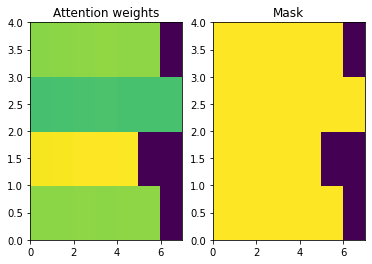

In [ ]:
plt.subplot(1, 2, 1)
plt.pcolormesh(attention_weights[:, 0, :])
plt.title('Attention weights')

plt.subplot(1, 2, 2)
plt.pcolormesh(example_tokens != 0)
plt.title('Mask')

In [ ]:
attention_weights.shape

TensorShape([4, 2, 7])

In [ ]:
attention_slice = attention_weights[0, 0].numpy()
attention_slice = attention_slice[attention_slice != 0]

<Figure size 432x288 with 0 Axes>

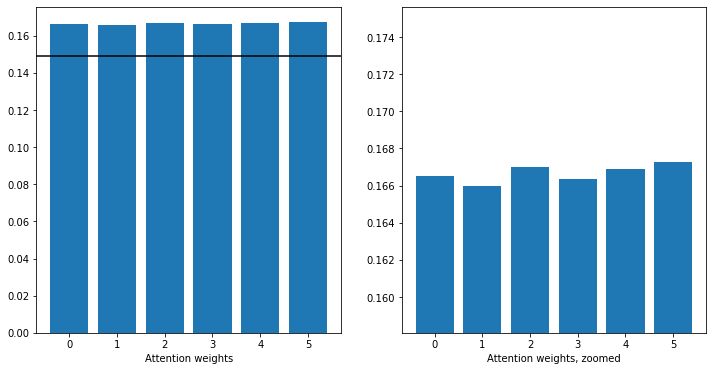

In [ ]:
#@title
plt.suptitle('Attention weights for one sequence')

plt.figure(figsize=(12, 6))
a1 = plt.subplot(1, 2, 1)
plt.bar(range(len(attention_slice)), attention_slice)
# freeze the xlim
plt.xlim(plt.xlim())
plt.xlabel('Attention weights')

a2 = plt.subplot(1, 2, 2)
plt.bar(range(len(attention_slice)), attention_slice)
plt.xlabel('Attention weights, zoomed')

# zoom in
top = max(a1.get_ylim())
zoom = 0.85*top
a2.set_ylim([0.90*top, top])
a1.plot(a1.get_xlim(), [zoom, zoom], color='k')

In [ ]:
class Decoder(tf.keras.layers.Layer):
  def __init__(self, output_vocab_size, embedding_dim, dec_units):
    super(Decoder, self).__init__()
    self.dec_units = dec_units
    self.output_vocab_size = output_vocab_size
    self.embedding_dim = embedding_dim

    # For Step 1. The embedding layer convets token IDs to vectors
    self.embedding = tf.keras.layers.Embedding(self.output_vocab_size,
                                               embedding_dim)

    # For Step 2. The RNN keeps track of what's been generated so far.
    self.gru = tf.keras.layers.GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

    # For step 3. The RNN output will be the query for the attention layer.
    self.attention = BahdanauAttention(self.dec_units)

    # For step 4. Eqn. (3): converting `ct` to `at`
    self.Wc = tf.keras.layers.Dense(dec_units, activation=tf.math.tanh,
                                    use_bias=False)

    # For step 5. This fully connected layer produces the logits for each
    # output token.
    self.fc = tf.keras.layers.Dense(self.output_vocab_size)

In [ ]:
class DecoderInput(typing.NamedTuple):
  new_tokens: Any
  enc_output: Any
  mask: Any

class DecoderOutput(typing.NamedTuple):
  logits: Any
  attention_weights: Any

In [ ]:
def call(self,
         inputs: DecoderInput,
         state=None) -> Tuple[DecoderOutput, tf.Tensor]:
  shape_checker = ShapeChecker()
  shape_checker(inputs.new_tokens, ('batch', 't'))
  shape_checker(inputs.enc_output, ('batch', 's', 'enc_units'))
  shape_checker(inputs.mask, ('batch', 's'))

  if state is not None:
    shape_checker(state, ('batch', 'dec_units'))

  # Step 1. Lookup the embeddings
  vectors = self.embedding(inputs.new_tokens)
  shape_checker(vectors, ('batch', 't', 'embedding_dim'))

  # Step 2. Process one step with the RNN
  rnn_output, state = self.gru(vectors, initial_state=state)

  shape_checker(rnn_output, ('batch', 't', 'dec_units'))
  shape_checker(state, ('batch', 'dec_units'))

  # Step 3. Use the RNN output as the query for the attention over the
  # encoder output.
  context_vector, attention_weights = self.attention(
      query=rnn_output, value=inputs.enc_output, mask=inputs.mask)
  shape_checker(context_vector, ('batch', 't', 'dec_units'))
  shape_checker(attention_weights, ('batch', 't', 's'))

  # Step 4. Eqn. (3): Join the context_vector and rnn_output
  #     [ct; ht] shape: (batch t, value_units + query_units)
  context_and_rnn_output = tf.concat([context_vector, rnn_output], axis=-1)

  # Step 4. Eqn. (3): `at = tanh(Wc@[ct; ht])`
  attention_vector = self.Wc(context_and_rnn_output)
  shape_checker(attention_vector, ('batch', 't', 'dec_units'))

  # Step 5. Generate logit predictions:
  logits = self.fc(attention_vector)
  shape_checker(logits, ('batch', 't', 'output_vocab_size'))

  return DecoderOutput(logits, attention_weights), state

In [ ]:
Decoder.call = call

In [ ]:
def call(self,
         inputs: DecoderInput,
         state=None) -> Tuple[DecoderOutput, tf.Tensor]:
  shape_checker = ShapeChecker()
  shape_checker(inputs.new_tokens, ('batch', 't'))
  shape_checker(inputs.enc_output, ('batch', 's', 'enc_units'))
  shape_checker(inputs.mask, ('batch', 's'))

  if state is not None:
    shape_checker(state, ('batch', 'dec_units'))

  # Step 1. Lookup the embeddings
  vectors = self.embedding(inputs.new_tokens)
  shape_checker(vectors, ('batch', 't', 'embedding_dim'))

  # Step 2. Process one step with the RNN
  rnn_output, state = self.gru(vectors, initial_state=state)

  shape_checker(rnn_output, ('batch', 't', 'dec_units'))
  shape_checker(state, ('batch', 'dec_units'))

  # Step 3. Use the RNN output as the query for the attention over the
  # encoder output.
  context_vector, attention_weights = self.attention(
      query=rnn_output, value=inputs.enc_output, mask=inputs.mask)
  shape_checker(context_vector, ('batch', 't', 'dec_units'))
  shape_checker(attention_weights, ('batch', 't', 's'))

  # Step 4. Eqn. (3): Join the context_vector and rnn_output
  #     [ct; ht] shape: (batch t, value_units + query_units)
  context_and_rnn_output = tf.concat([context_vector, rnn_output], axis=-1)

  # Step 4. Eqn. (3): `at = tanh(Wc@[ct; ht])`
  attention_vector = self.Wc(context_and_rnn_output)
  shape_checker(attention_vector, ('batch', 't', 'dec_units'))

  # Step 5. Generate logit predictions:
  logits = self.fc(attention_vector)
  shape_checker(logits, ('batch', 't', 'output_vocab_size'))

  return DecoderOutput(logits, attention_weights), state

In [ ]:
decoder = Decoder(output_text_processor.vocabulary_size(),
                  embedding_dim, units)

In [ ]:
# Convert the target sequence, and collect the "[START]" tokens
example_output_tokens = output_text_processor(example_target_batch)

start_index = output_text_processor.get_vocabulary().index('[START]')
first_token = tf.constant([[start_index]] * example_output_tokens.shape[0])

In [ ]:
# Run the decoder
dec_result, dec_state = decoder(
    inputs = DecoderInput(new_tokens=first_token,
                          enc_output=example_enc_output,
                          mask=(example_tokens != 0)),
    state = example_enc_state
)

print(f'logits shape: (batch_size, t, output_vocab_size) {dec_result.logits.shape}')
print(f'state shape: (batch_size, dec_units) {dec_state.shape}')

logits shape: (batch_size, t, output_vocab_size) (4, 1, 395)
state shape: (batch_size, dec_units) (4, 1024)


In [ ]:
sampled_token = tf.random.categorical(dec_result.logits[:, 0, :], num_samples=1)

In [ ]:
vocab = np.array(output_text_processor.get_vocabulary())
first_word = vocab[sampled_token.numpy()]
first_word[:5]

array([['happy'],
       ['raise'],
       ['food'],
       ['every']], dtype='<U11')

In [ ]:
dec_result, dec_state = decoder(
    DecoderInput(sampled_token,
                 example_enc_output,
                 mask=(example_tokens != 0)),
    state=dec_state)

In [ ]:
sampled_token = tf.random.categorical(dec_result.logits[:, 0, :], num_samples=1)
first_word = vocab[sampled_token.numpy()]
first_word[:5]

array([['able'],
       ['those'],
       ['write'],
       ['before']], dtype='<U11')

In [ ]:
class MaskedLoss(tf.keras.losses.Loss):
  def __init__(self):
    self.name = 'masked_loss'
    self.loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')

  def __call__(self, y_true, y_pred):
    shape_checker = ShapeChecker()
    shape_checker(y_true, ('batch', 't'))
    shape_checker(y_pred, ('batch', 't', 'logits'))

    # Calculate the loss for each item in the batch.
    loss = self.loss(y_true, y_pred)
    shape_checker(loss, ('batch', 't'))

    # Mask off the losses on padding.
    mask = tf.cast(y_true != 0, tf.float32)
    shape_checker(mask, ('batch', 't'))
    loss *= mask

    # Return the total.
    return tf.reduce_sum(loss)

In [ ]:
class TrainTranslator(tf.keras.Model):
  def __init__(self, embedding_dim, units,
               input_text_processor,
               output_text_processor, 
               use_tf_function=True):
    super().__init__()
    # Build the encoder and decoder
    encoder = Encoder(input_text_processor.vocabulary_size(),
                      embedding_dim, units)
    decoder = Decoder(output_text_processor.vocabulary_size(),
                      embedding_dim, units)

    self.encoder = encoder
    self.decoder = decoder
    self.input_text_processor = input_text_processor
    self.output_text_processor = output_text_processor
    self.use_tf_function = use_tf_function
    self.shape_checker = ShapeChecker()

  def train_step(self, inputs):
    self.shape_checker = ShapeChecker()
    if self.use_tf_function:
      return self._tf_train_step(inputs)
    else:
      return self._train_step(inputs)

In [ ]:
def _preprocess(self, input_text, target_text):
  self.shape_checker(input_text, ('batch',))
  self.shape_checker(target_text, ('batch',))

  # Convert the text to token IDs
  input_tokens = self.input_text_processor(input_text)
  target_tokens = self.output_text_processor(target_text)
  self.shape_checker(input_tokens, ('batch', 's'))
  self.shape_checker(target_tokens, ('batch', 't'))

  # Convert IDs to masks.
  input_mask = input_tokens != 0
  self.shape_checker(input_mask, ('batch', 's'))

  target_mask = target_tokens != 0
  self.shape_checker(target_mask, ('batch', 't'))

  return input_tokens, input_mask, target_tokens, target_mask

In [ ]:
TrainTranslator._preprocess = _preprocess

In [ ]:
def _train_step(self, inputs):
  input_text, target_text = inputs  

  (input_tokens, input_mask,
   target_tokens, target_mask) = self._preprocess(input_text, target_text)

  max_target_length = tf.shape(target_tokens)[1]

  with tf.GradientTape() as tape:
    # Encode the input
    enc_output, enc_state = self.encoder(input_tokens)
    self.shape_checker(enc_output, ('batch', 's', 'enc_units'))
    self.shape_checker(enc_state, ('batch', 'enc_units'))

    # Initialize the decoder's state to the encoder's final state.
    # This only works if the encoder and decoder have the same number of
    # units.
    dec_state = enc_state
    loss = tf.constant(0.0)

    for t in tf.range(max_target_length-1):
      # Pass in two tokens from the target sequence:
      # 1. The current input to the decoder.
      # 2. The target for the decoder's next prediction.
      new_tokens = target_tokens[:, t:t+2]
      step_loss, dec_state = self._loop_step(new_tokens, input_mask,
                                             enc_output, dec_state)
      loss = loss + step_loss

    # Average the loss over all non padding tokens.
    average_loss = loss / tf.reduce_sum(tf.cast(target_mask, tf.float32))

  # Apply an optimization step
  variables = self.trainable_variables 
  gradients = tape.gradient(average_loss, variables)
  self.optimizer.apply_gradients(zip(gradients, variables))

  # Return a dict mapping metric names to current value
  return {'batch_loss': average_loss}

In [ ]:
TrainTranslator._train_step = _train_step

In [ ]:
def _loop_step(self, new_tokens, input_mask, enc_output, dec_state):
  input_token, target_token = new_tokens[:, 0:1], new_tokens[:, 1:2]

  # Run the decoder one step.
  decoder_input = DecoderInput(new_tokens=input_token,
                               enc_output=enc_output,
                               mask=input_mask)

  dec_result, dec_state = self.decoder(decoder_input, state=dec_state)
  self.shape_checker(dec_result.logits, ('batch', 't1', 'logits'))
  self.shape_checker(dec_result.attention_weights, ('batch', 't1', 's'))
  self.shape_checker(dec_state, ('batch', 'dec_units'))

  # `self.loss` returns the total for non-padded tokens
  y = target_token
  y_pred = dec_result.logits
  step_loss = self.loss(y, y_pred)

  return step_loss, dec_state

In [ ]:
TrainTranslator._loop_step = _loop_step

In [ ]:
translator = TrainTranslator(
    embedding_dim, units,
    input_text_processor=input_text_processor,
    output_text_processor=output_text_processor,
    use_tf_function=False)

# Configure the loss and optimizer
translator.compile(
    optimizer=tf.optimizers.Adam(),
    loss=MaskedLoss(),
)

In [ ]:
np.log(output_text_processor.vocabulary_size())

5.978885764901122

In [ ]:
%%time
for n in range(10):
  print(translator.train_step([example_input_batch, example_target_batch]))
print()

{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=5.275491>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=5.153294>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=4.9619107>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=4.548082>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=3.556677>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=3.1249561>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=2.3948252>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=2.2495954>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=2.0899487>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=1.8090272>}

CPU times: user 20.7 s, sys: 1.19 s, total: 21.9 s
Wall time: 15.5 s


In [ ]:
@tf.function(input_signature=[[tf.TensorSpec(dtype=tf.string, shape=[None]),
                               tf.TensorSpec(dtype=tf.string, shape=[None])]])
def _tf_train_step(self, inputs):
  return self._train_step(inputs)

In [ ]:
TrainTranslator._tf_train_step = _tf_train_step

In [ ]:
translator.use_tf_function = True

In [ ]:
translator.train_step([example_input_batch, example_target_batch])

{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=1.5126112>}

In [ ]:
%%time
for n in range(10):
  print(translator.train_step([example_input_batch, example_target_batch]))
print()

{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=1.3978682>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=1.3135214>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=1.0082126>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=1.0145004>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.7706203>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.6879458>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.63238394>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.4557523>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.44537887>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.35838348>}

CPU times: user 15.7 s, sys: 504 ms, total: 16.2 s
Wall time: 8.7 s


....................................................................................................


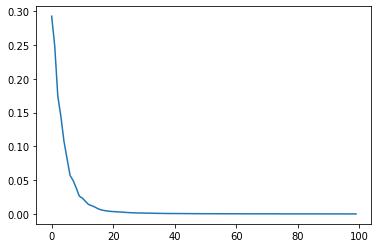

In [ ]:
losses = []
for n in range(100):
  print('.', end='')
  logs = translator.train_step([example_input_batch, example_target_batch])
  losses.append(logs['batch_loss'].numpy())

print()
plt.plot(losses)

In [ ]:
train_translator = TrainTranslator(
    embedding_dim, units,
    input_text_processor=input_text_processor,
    output_text_processor=output_text_processor)

# Configure the loss and optimizer
train_translator.compile(
    optimizer=tf.optimizers.Adam(),
    loss=MaskedLoss(),
)

In [ ]:
class BatchLogs(tf.keras.callbacks.Callback):
  def __init__(self, key):
    self.key = key
    self.logs = []

  def on_train_batch_end(self, n, logs):
    self.logs.append(logs[self.key])

batch_loss = BatchLogs('batch_loss')

In [ ]:
train_translator.fit(dataset, epochs=3,
                     callbacks=[batch_loss])

Epoch 1/3
254/254 [==============================] - 258s 987ms/step - batch_loss: 2.9197
Epoch 2/3
254/254 [==============================] - 248s 977ms/step - batch_loss: 0.9084
Epoch 3/3
254/254 [==============================] - 283s 1s/step - batch_loss: 0.1456


Text(0, 0.5, 'CE/token')

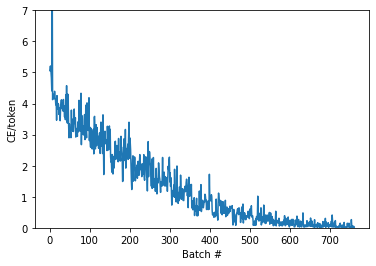

In [ ]:
plt.plot(batch_loss.logs)
plt.ylim([0, 7])
plt.xlabel('Batch #')
plt.ylabel('CE/token')

In [ ]:
class Translator(tf.Module):

  def __init__(self, encoder, decoder, input_text_processor,
               output_text_processor):
    self.encoder = encoder
    self.decoder = decoder
    self.input_text_processor = input_text_processor
    self.output_text_processor = output_text_processor

    self.output_token_string_from_index = (
        tf.keras.layers.StringLookup(
            vocabulary=output_text_processor.get_vocabulary(),
            mask_token='',
            invert=True))

    # The output should never generate padding, unknown, or start.
    index_from_string = tf.keras.layers.StringLookup(
        vocabulary=output_text_processor.get_vocabulary(), mask_token='')
    token_mask_ids = index_from_string(['', '[UNK]', '[START]']).numpy()

    token_mask = np.zeros([index_from_string.vocabulary_size()], dtype=np.bool)
    token_mask[np.array(token_mask_ids)] = True
    self.token_mask = token_mask

    self.start_token = index_from_string(tf.constant('[START]'))
    self.end_token = index_from_string(tf.constant('[END]'))

In [ ]:
translator = Translator(
    encoder=train_translator.encoder,
    decoder=train_translator.decoder,
    input_text_processor=input_text_processor,
    output_text_processor=output_text_processor,
)

In [ ]:
def tokens_to_text(self, result_tokens):
  shape_checker = ShapeChecker()
  shape_checker(result_tokens, ('batch', 't'))
  result_text_tokens = self.output_token_string_from_index(result_tokens)
  shape_checker(result_text_tokens, ('batch', 't'))

  result_text = tf.strings.reduce_join(result_text_tokens,
                                       axis=1, separator=' ')
  shape_checker(result_text, ('batch'))

  result_text = tf.strings.strip(result_text)
  shape_checker(result_text, ('batch',))
  return result_text

In [ ]:
Translator.tokens_to_text = tokens_to_text

In [ ]:
example_output_tokens = tf.random.uniform(
    shape=[5, 2], minval=0, dtype=tf.int64,
    maxval=output_text_processor.vocabulary_size())
translator.tokens_to_text(example_output_tokens).numpy()

array([b'cake eggs', b'want crazy', b'too sister', b"slowly i'll",
       b'friend ahead'], dtype=object)

In [ ]:
def sample(self, logits, temperature):
  shape_checker = ShapeChecker()
  # 't' is usually 1 here.
  shape_checker(logits, ('batch', 't', 'vocab'))
  shape_checker(self.token_mask, ('vocab',))

  token_mask = self.token_mask[tf.newaxis, tf.newaxis, :]
  shape_checker(token_mask, ('batch', 't', 'vocab'), broadcast=True)

  # Set the logits for all masked tokens to -inf, so they are never chosen.
  logits = tf.where(self.token_mask, -np.inf, logits)

  if temperature == 0.0:
    new_tokens = tf.argmax(logits, axis=-1)
  else: 
    logits = tf.squeeze(logits, axis=1)
    new_tokens = tf.random.categorical(logits/temperature,
                                        num_samples=1)
  
  shape_checker(new_tokens, ('batch', 't'))

  return new_tokens

In [ ]:
Translator.sample = sample

In [ ]:
example_logits = tf.random.normal([5, 1, output_text_processor.vocabulary_size()])
example_output_tokens = translator.sample(example_logits, temperature=1.0)
example_output_tokens

<tf.Tensor: shape=(5, 1), dtype=int64, numpy=
array([[175],
       [343],
       [357],
       [212],
       [324]])>

In [ ]:
def translate_unrolled(self,
                       input_text, *,
                       max_length=50,
                       return_attention=True,
                       temperature=1.0):
  batch_size = tf.shape(input_text)[0]
  input_tokens = self.input_text_processor(input_text)
  enc_output, enc_state = self.encoder(input_tokens)

  dec_state = enc_state
  new_tokens = tf.fill([batch_size, 1], self.start_token)

  result_tokens = []
  attention = []
  done = tf.zeros([batch_size, 1], dtype=tf.bool)

  for _ in range(max_length):
    dec_input = DecoderInput(new_tokens=new_tokens,
                             enc_output=enc_output,
                             mask=(input_tokens!=0))
    
    dec_result, dec_state = self.decoder(dec_input, state=dec_state)

    attention.append(dec_result.attention_weights)

    new_tokens = self.sample(dec_result.logits, temperature)

    # If a sequence produces an `end_token`, set it `done`
    done = done | (new_tokens == self.end_token)
    # Once a sequence is done it only produces 0-padding.
    new_tokens = tf.where(done, tf.constant(0, dtype=tf.int64), new_tokens)

    # Collect the generated tokens
    result_tokens.append(new_tokens)

    if tf.executing_eagerly() and tf.reduce_all(done):
      break

  # Convert the list of generates token ids to a list of strings.
  result_tokens = tf.concat(result_tokens, axis=-1)
  result_text = self.tokens_to_text(result_tokens)

  if return_attention:
    attention_stack = tf.concat(attention, axis=1)
    return {'text': result_text, 'attention': attention_stack}
  else:
    return {'text': result_text}


In [ ]:
Translator.translate = translate_unrolled

In [ ]:
%%time
input_text = tf.constant([
    'நான் தூங்கினேன்.', # "I slept."
    'அவள் சிரித்தாள்',  #She smiled
    'போய் தூங்கு', #Go to sleep 
    'முட்டைகளின் விலை அதிகரித்துக் கொண்டிருக்கிறது'

])

result = translator.translate(
    input_text = input_text)

print(result['text'][0].numpy().decode())
print(result['text'][1].numpy().decode())
print(result['text'][2].numpy().decode())
print(result['text'][3].numpy().decode())
print()

i slept .
she smiled .
go to sleep .
the price of eggs is going up .

CPU times: user 601 ms, sys: 10.3 ms, total: 611 ms
Wall time: 535 ms


In [ ]:
@tf.function(input_signature=[tf.TensorSpec(dtype=tf.string, shape=[None])])
def tf_translate(self, input_text):
  return self.translate(input_text)

Translator.tf_translate = tf_translate

In [ ]:
%%time
result = translator.tf_translate(
    input_text = input_text)

CPU times: user 43 s, sys: 812 ms, total: 43.8 s
Wall time: 43.2 s


In [ ]:
%%time
result = translator.tf_translate(
    input_text = input_text)

print(result['text'][0].numpy().decode())
print(result['text'][1].numpy().decode())
print()

i slept .
she smiled .

CPU times: user 1.77 s, sys: 100 ms, total: 1.87 s
Wall time: 1.17 s


In [ ]:
a = result['attention'][0]

print(np.sum(a, axis=-1))

[0.99999994 0.99999994 1.         1.         1.0000001  1.
 1.         0.99999994 1.         1.         1.0000001  0.99999994
 1.         0.9999998  0.99999994 1.0000001  1.         0.99999994
 0.99999994 1.         1.         1.         0.99999994 0.9999999
 0.9999998  0.99999994 0.99999994 0.99999994 1.         1.0000002
 1.0000001  1.0000001  1.         0.9999999  1.         1.0000001
 1.0000001  0.9999999  0.99999994 1.         1.         1.
 1.         1.         1.0000001  1.         1.         1.0000001
 1.         0.99999994]


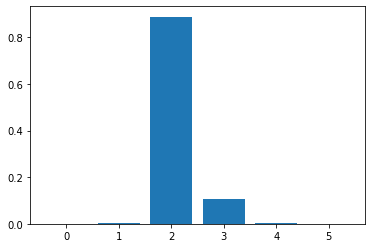

In [ ]:
_ = plt.bar(range(len(a[0, :])), a[0, :])

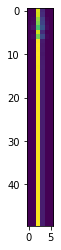

In [ ]:
plt.imshow(np.array(a), vmin=0.0)

In [ ]:
tf.saved_model.save(translator, '/content/drive/MyDrive/Intro_to_deepLearning/Assignment_7/translator',
                    signatures={'serving_default': translator.tf_translate})

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Intro_to_deepLearning/Assignment_7/translator/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Intro_to_deepLearning/Assignment_7/translator/assets


In [ ]:
%%time
three_input_text = tf.constant([
    'நான் தூங்கினேன்.', # "I slept."
    'அவள் சிரித்தாள்',  #She smiled
    'போய் தூங்கு', #Go to sleep
])

result = translator.tf_translate(three_input_text)

for tr in result['text']:
  print(tr.numpy().decode())

print()

i slept .
she smiled .
go to sleep .

CPU times: user 669 ms, sys: 23.1 ms, total: 692 ms
Wall time: 419 ms


In [ ]:
reloaded = tf.saved_model.load('/content/drive/MyDrive/Intro_to_deepLearning/Assignment_7/translator')
result = reloaded.tf_translate(three_input_text)

In [ ]:
%%time
result = reloaded.tf_translate(three_input_text)

for tr in result['text']:
  print(tr.numpy().decode())

print()

i slept .
she smiled .
go to sleep .

CPU times: user 683 ms, sys: 31.1 ms, total: 714 ms
Wall time: 432 ms



1. Which parts of the sentence are used as a token? Each character, each word, or are some words split up?
> Each word punctuations and characters.
2. Do the same tokens in different language have same ID?
> Yes
3. What is the relation between the encoder output and the encoder hidden state which is used to initialize the decoder hidden state (for the architecture used in the tutorial)?
> The previous state output from the decoder (the internal state of the decoder's RNN). Pass None to zero-initialize it. The original paper initializes it from the encoder's final RNN state.
4. Is the decoder attending to all previous positions, including the previous decoder predictions?
> It uses an RNN to keep track of what it has generated so far
5. Does the encoder output change in different decoding steps?
> Yes, The attention weights generated are different for each sequence, thus the encoder output is differet fro different decoder steps.
6. Does the context vector change in different decoding steps?
Yes, The attention weights generated are different for each sequence, thus the encoder output is differet fro different decoder steps.
7. The decoder uses teacher forcing. Does this mean the time steps can be computed in parallel?
> Teacher forcing is a strategy for training recurrent neural networks that uses ground truth as input, instead of model output from a prior time step as an input- Therefore,time steps can be computed in parallel. 
8. Why is a mask applied to the loss function?
> To eliminate the padding effect in model training, masking could be used on input and loss function.
9. When translating the same sentence multiple times, do you get the same result? Why (not)? If not, what changes need to be made to get the same result each time?
> In my case, I have repeated the data due to less number of original samples. With this, the model trained the same sequence repeatedly. I feel this is the reason for repeatedly geetting the same translation.

